# AQI Classifier

## Importing Scraped Data

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir= 'AQI_Estimator_Dataset\Training'
validation_dir = 'AQI_Estimator_Dataset\Validation'

## Data Pre-Processing

In [18]:
# Define data generators with image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

# Creating Training and Testing Splits

In [19]:
# Define batch size and image size
batch_size = 32
img_size = (224, 224)

# Create training and validation data generators
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size=img_size,
                                                              batch_size=batch_size,
                                                              class_mode='binary')

Found 243 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


# Creating and Fine-tuning the Model

In [20]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.n//batch_size,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.n//batch_size)
model.save('air_quality_model.keras') #saving the model

Epoch 1/20
7/7 [==============================] - 19s 3s/step - loss: 0.6879 - accuracy: 0.6250 - val_loss: 0.6393 - val_accuracy: 0.8125
Epoch 2/20
7/7 [==============================] - 18s 3s/step - loss: 0.6167 - accuracy: 0.7204 - val_loss: 0.5217 - val_accuracy: 0.8750
Epoch 3/20
7/7 [==============================] - 18s 3s/step - loss: 0.5269 - accuracy: 0.7232 - val_loss: 0.5056 - val_accuracy: 0.7344
Epoch 4/20
7/7 [==============================] - 17s 2s/step - loss: 0.6011 - accuracy: 0.6730 - val_loss: 0.4654 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 17s 2s/step - loss: 0.4542 - accuracy: 0.8009 - val_loss: 0.3762 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 17s 2s/step - loss: 0.4864 - accuracy: 0.7678 - val_loss: 0.3644 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 18s 3s/step - loss: 0.4333 - accuracy: 0.8057 - val_loss: 0.3607 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==================

# Manual Testing and AQI Prediction

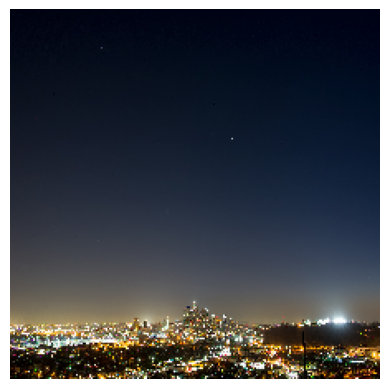

1/1 [==============================] - 0s 118ms/step
Estimated AQI:  [114.84495]
The air in the image is moderately polluted


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

model= tf.keras.models.load_model('air_quality_model.keras') #loading the model
img_size = (224, 224)
# Load and preprocess the new image
img_path = 'Sample_Images\Image_57.jpg'
img = image.load_img(img_path, target_size=img_size)
x = image.img_to_array(img)
x /= 255.
x = np.expand_dims(x, axis=0)

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

# Make a prediction using the model
prediction = model.predict(x)

# Print the predicted class (0 for clean air, 1 for polluted air)
aqi=prediction[0]*500
print("Estimated AQI: ",aqi)
if aqi<=50:
  print("The air in the image is clean")
if aqi>50 and aqi<=100:
    print("The air in the image is satisfactory")
if aqi>100 and aqi<=200:
  print("The air in the image is moderately polluted")
if aqi>200 and aqi<=300:
  print("The air in the image is poor")
if aqi>300 and aqi<=400:
  print("The air in the image is heavily polluted")
if aqi>400:
  print("The air in the image is severely polluted")